Unit 6 Reading
Sarkar, T. & Roychowdhury, S. (2019) Data Wrangling with Python. 1st ed. Packt.
Chapter 9 Application of Data Wrangling in Real Life

The task
 "In India, did the enrollment in primary/secondary/tertiary education increase with improvement of per capita GDP in the past 15 years?"
 
"The data source
Suppose you have a link for a dataset from the United Nations and you can download the dataset of education (for all the nations around the world). But this dataset has some missing values and moreover it does not have any GDP information. Someone has given you another separate CSV file (downloaded from the World Bank site) which contains GDP data but in a messy format.

In this notebook, we will examine how to handle these two separate sources and to clean the data to prepare a simple final dataset with the required data and save it to the local drive as a SQL database file.

The link for the education data: http://data.un.org/_Docs/SYB/CSV/SYB61_T07_Education.csv

The link for the GDP data (hosted on Packt Github repository for this course): https://github.com/TrainingByPackt/Data-Wrangling-with-Python/blob/master/Lesson09/Activity12-15/India_World_Bank_Info.csv"


In [1]:
#Install libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
education_data_link="http://data.un.org/_Docs/SYB/CSV/SYB61_T07_Education.csv"

In [3]:
#Read into a data frame

df1 = pd.read_csv(education_data_link)
df1.head()

,T07,"Enrolment in primary, secondary and tertiary education levels",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,1,"Total, all countries or areas",2005,Students enrolled in primary education (thousa...,"678,990",NaN,"United Nations Educational, Scientific and Cul..."
2,1,"Total, all countries or areas",2005,Gross enrollement ratio - Primary (male),104.8,NaN,"United Nations Educational, Scientific and Cul..."
3,1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (female),99.8,NaN,"United Nations Educational, Scientific and Cul..."
4,1,"Total, all countries or areas",2005,Students enrolled in secondary education (thou...,"509,100",NaN,"United Nations Educational, Scientific and Cul..."


In [4]:
#no useful data in first row

df1 = pd.read_csv(education_data_link,skiprows=1)
df1.head()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2005,Students enrolled in primary education (thousa...,"678,990",NaN,"United Nations Educational, Scientific and Cul..."
1,1,"Total, all countries or areas",2005,Gross enrollement ratio - Primary (male),104.8,NaN,"United Nations Educational, Scientific and Cul..."
2,1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (female),99.8,NaN,"United Nations Educational, Scientific and Cul..."
3,1,"Total, all countries or areas",2005,Students enrolled in secondary education (thou...,"509,100",NaN,"United Nations Educational, Scientific and Cul..."
4,1,"Total, all countries or areas",2005,Gross enrollment ratio - Secondary (male),65.7,NaN,"United Nations Educational, Scientific and Cul..."


In [5]:
#drop some uneeded columns

df2 = df1.drop(['Region/Country/Area','Source'],axis=1)

In [6]:
#rename headers
df2.columns=['Region/Country/Area','Year','Data','Enrollments (Thousands)','Footnotes']

df2.head()

,Region/Country/Area,Year,Data,Enrollments (Thousands),Footnotes
0,"Total, all countries or areas",2005,Students enrolled in primary education (thousa...,"678,990",NaN
1,"Total, all countries or areas",2005,Gross enrollement ratio - Primary (male),104.8,NaN
2,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (female),99.8,NaN
3,"Total, all countries or areas",2005,Students enrolled in secondary education (thou...,"509,100",NaN
4,"Total, all countries or areas",2005,Gross enrollment ratio - Secondary (male),65.7,NaN


In [7]:
#check if any useful data in footnotes and data types (validating data as per data wrangling standard process)
df2['Footnotes'].unique()

array([nan, 'Estimate.',
       'For statistical purposes, the data for China do not include those for the Hong Kong Special Administrative Region (Hong Kong SAR), Macao Special Administrative Region (Macao SAR) and Taiwan Province of China.'],
      dtype=object)

In [8]:
type(df2['Enrollments (Thousands)'][0])

str

In [9]:
#above should be a number really for analysis, guide suggests a small function to change to float (numbers)

def to_numeric(val):
    """
    Converts a given string (with one or more commas) to a numeric value
    """
    if ',' not in str(val):
        result = float(val)
    else:
        val=str(val)
        val=''.join(str(val).split(','))
        result=float(val)
    return result

In [10]:
#function applied to the columns

df2['Enrollments (Thousands)']=df2['Enrollments (Thousands)'].apply(to_numeric)

In [11]:
type(df2['Enrollments (Thousands)'][0])

numpy.float64

In [12]:
#check data types then create a seperate data frame for each of the data types that give numbers per education group

df2['Data'].unique()

array(['Students enrolled in primary education (thousands)',
       'Gross enrollement ratio - Primary (male)',
       'Gross enrollment ratio - Primary (female)',
       'Students enrolled in secondary education (thousands)',
       'Gross enrollment ratio - Secondary (male)',
       'Gross enrollment ratio - Secondary (female)',
       'Students enrolled in tertiary education (thousands)',
       'Gross enrollment ratio - Tertiary (male)',
       'Gross enrollment ratio - Tertiary (female)'], dtype=object)

In [13]:
df_primary = df2[df2['Data']=='Students enrolled in primary education (thousands)']
df_secondary = df2[df2['Data']=='Students enrolled in secondary education (thousands)']
df_tertiary = df2[df2['Data']=='Students enrolled in tertiary education (thousands)']

In [14]:
#Now to visulise the data for a high and low income country to look for gaps, both sub data frame of the new three above

primary_enrollment_india = df_primary[df_primary['Region/Country/Area']=='India']
primary_enrollment_USA = df_primary[df_primary['Region/Country/Area']=='United States of America']

In [15]:
primary_enrollment_india

,Region/Country/Area,Year,Data,Enrollments (Thousands),Footnotes
3729,India,2003,Students enrolled in primary education (thousa...,125569.0,NaN
3744,India,2010,Students enrolled in primary education (thousa...,138414.0,NaN
3753,India,2014,Students enrolled in primary education (thousa...,137809.0,NaN
3762,India,2015,Students enrolled in primary education (thousa...,138518.0,NaN
3771,India,2016,Students enrolled in primary education (thousa...,145803.0,NaN


In [16]:
primary_enrollment_USA

,Region/Country/Area,Year,Data,Enrollments (Thousands),Footnotes
7858,United States of America,2005,Students enrolled in primary education (thousa...,24455.0,NaN
7865,United States of America,2010,Students enrolled in primary education (thousa...,24393.0,NaN
7872,United States of America,2014,Students enrolled in primary education (thousa...,24538.0,NaN
7879,United States of America,2015,Students enrolled in primary education (thousa...,24786.0,NaN


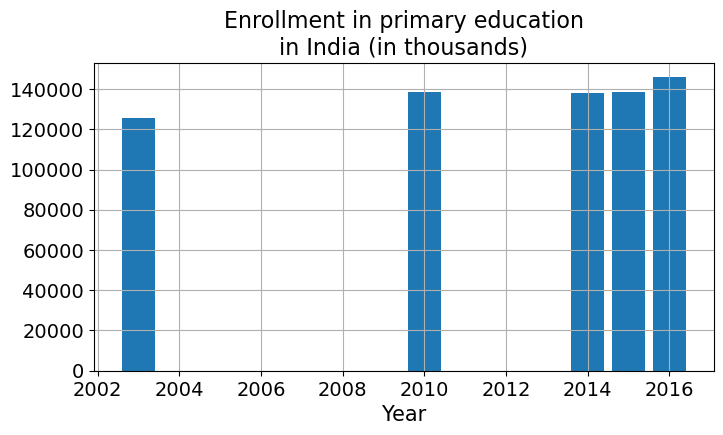

In [17]:
plt.figure(figsize=(8,4))
plt.bar(primary_enrollment_india['Year'],primary_enrollment_india['Enrollments (Thousands)'])
plt.title("Enrollment in primary education\nin India (in thousands)",fontsize=16)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=15)
plt.show()

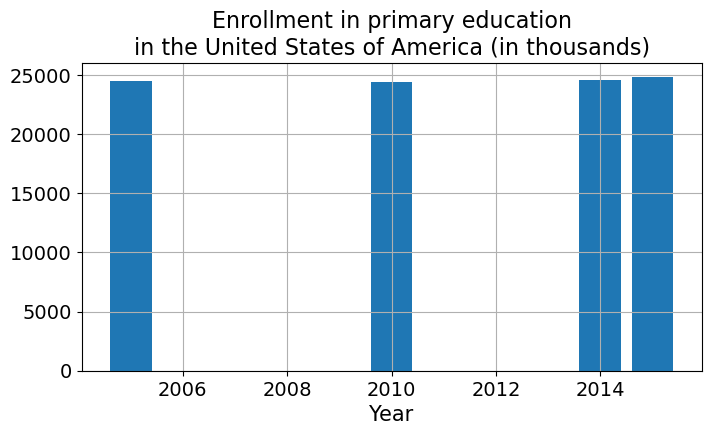

In [18]:
plt.figure(figsize=(8,4))
plt.bar(primary_enrollment_USA['Year'],primary_enrollment_USA['Enrollments (Thousands)'])
plt.title("Enrollment in primary education\nin the United States of America (in thousands)",fontsize=16)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=15)
plt.show()

In [19]:
#missing data so book suggests  "impute these data points by simple linear interpolation between available data points."

#append rows corresponding to missing years

missing_years = [y for y in range(2004,2010)]+[y for y in range(2011,2014)]
missing_years

[2004, 2005, 2006, 2007, 2008, 2009, 2011, 2012, 2013]

In [20]:
#Creating a dictionary of values with np.nan (9 years)

dict_missing = {'Region/Country/Area':['India']*9,'Year':missing_years,
                'Data':'Students enrolled in primary education (thousands)'*9,
                'Enrollments (Thousands)':[np.nan]*9,'Footnotes':[np.nan]*9}

In [21]:
#dataframe of missing values from the dictionary
df_missing = pd.DataFrame(data=dict_missing)

In [22]:
#append to main df
primary_enrollment_india=primary_enrollment_india.append(df_missing,ignore_index=True,sort=True)
primary_enrollment_india

,Data,Enrollments (Thousands),Footnotes,Region/Country/Area,Year
0,Students enrolled in primary education (thousa...,125569.0,NaN,India,2003
1,Students enrolled in primary education (thousa...,138414.0,NaN,India,2010
2,Students enrolled in primary education (thousa...,137809.0,NaN,India,2014
3,Students enrolled in primary education (thousa...,138518.0,NaN,India,2015
4,Students enrolled in primary education (thousa...,145803.0,NaN,India,2016
5,Students enrolled in primary education (thousa...,NaN,NaN,India,2004
6,Students enrolled in primary education (thousa...,NaN,NaN,India,2005
7,Students enrolled in primary education (thousa...,NaN,NaN,India,2006
8,Students enrolled in primary education (thousa...,NaN,NaN,India,2007
9,Students enrolled in primary education (thousa...,NaN,NaN,India,2008


In [23]:
#sort by year (inplace affects actual df)
primary_enrollment_india.sort_values(by='Year',inplace=True)

In [24]:
primary_enrollment_india.reset_index(inplace=True,drop=True)

In [25]:
primary_enrollment_india

,Data,Enrollments (Thousands),Footnotes,Region/Country/Area,Year
0,Students enrolled in primary education (thousa...,125569.0,NaN,India,2003
1,Students enrolled in primary education (thousa...,NaN,NaN,India,2004
2,Students enrolled in primary education (thousa...,NaN,NaN,India,2005
3,Students enrolled in primary education (thousa...,NaN,NaN,India,2006
4,Students enrolled in primary education (thousa...,NaN,NaN,India,2007
5,Students enrolled in primary education (thousa...,NaN,NaN,India,2008
6,Students enrolled in primary education (thousa...,NaN,NaN,India,2009
7,Students enrolled in primary education (thousa...,138414.0,NaN,India,2010
8,Students enrolled in primary education (thousa...,NaN,NaN,India,2011
9,Students enrolled in primary education (thousa...,NaN,NaN,India,2012


In [26]:
#book now suggests using interpolate method for linear interpolation. It fills all the NaN by linearly interpolated values.

primary_enrollment_india.interpolate(inplace=True)

In [27]:
primary_enrollment_india

,Data,Enrollments (Thousands),Footnotes,Region/Country/Area,Year
0,Students enrolled in primary education (thousa...,125569.00,NaN,India,2003
1,Students enrolled in primary education (thousa...,127404.00,NaN,India,2004
2,Students enrolled in primary education (thousa...,129239.00,NaN,India,2005
3,Students enrolled in primary education (thousa...,131074.00,NaN,India,2006
4,Students enrolled in primary education (thousa...,132909.00,NaN,India,2007
5,Students enrolled in primary education (thousa...,134744.00,NaN,India,2008
6,Students enrolled in primary education (thousa...,136579.00,NaN,India,2009
7,Students enrolled in primary education (thousa...,138414.00,NaN,India,2010
8,Students enrolled in primary education (thousa...,138262.75,NaN,India,2011
9,Students enrolled in primary education (thousa...,138111.50,NaN,India,2012


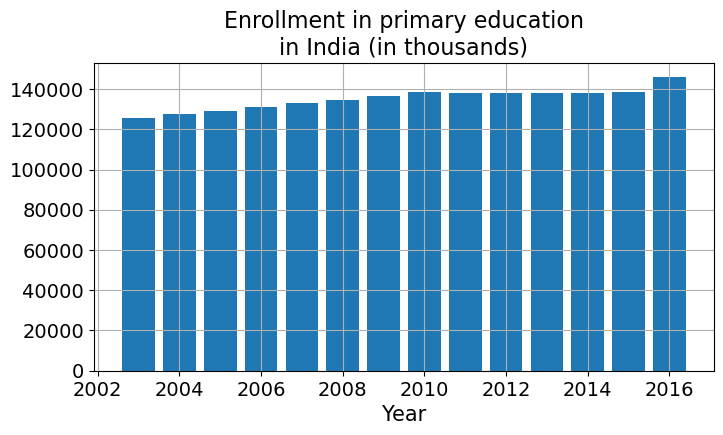

In [28]:
#chart again

plt.figure(figsize=(8,4))
plt.bar(primary_enrollment_india['Year'],primary_enrollment_india['Enrollments (Thousands)'])
plt.title("Enrollment in primary education\nin India (in thousands)",fontsize=16)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=15)
plt.show()

In [29]:
#Repeat for USA!

missing_years = [2004]+[y for y in range(2006,2010)]+[y for y in range(2011,2014)]+[2016]

dict_missing = {'Region/Country/Area':['United States of America']*9,'Year':missing_years,
                'Data':'Students enrolled in primary education (thousands)'*9,
                'Value':[np.nan]*9,'Footnotes':[np.nan]*9}

df_missing = pd.DataFrame(data=dict_missing)

primary_enrollment_USA=primary_enrollment_USA.append(df_missing,ignore_index=True,sort=True)

primary_enrollment_USA.sort_values(by='Year',inplace=True)

primary_enrollment_USA.reset_index(inplace=True,drop=True)

primary_enrollment_USA.interpolate(inplace=True)

primary_enrollment_USA

,Data,Enrollments (Thousands),Footnotes,Region/Country/Area,Value,Year
0,Students enrolled in primary education (thousa...,NaN,NaN,United States of America,NaN,2004
1,Students enrolled in primary education (thousa...,24455.00,NaN,United States of America,NaN,2005
2,Students enrolled in primary education (thousa...,24442.60,NaN,United States of America,NaN,2006
3,Students enrolled in primary education (thousa...,24430.20,NaN,United States of America,NaN,2007
4,Students enrolled in primary education (thousa...,24417.80,NaN,United States of America,NaN,2008
5,Students enrolled in primary education (thousa...,24405.40,NaN,United States of America,NaN,2009
6,Students enrolled in primary education (thousa...,24393.00,NaN,United States of America,NaN,2010
7,Students enrolled in primary education (thousa...,24429.25,NaN,United States of America,NaN,2011
8,Students enrolled in primary education (thousa...,24465.50,NaN,United States of America,NaN,2012
9,Students enrolled in primary education (thousa...,24501.75,NaN,United States of America,NaN,2013


In [30]:
#but first value is missing! 
#Book says: We can use limit and limit_direction parameters with interpolate() method to fill that - 
#solution found via google and stackoverflow - a common problem solving method for code 
#(book forgot in place so coding corrected!)

primary_enrollment_USA.interpolate(method='linear',limit_direction='backward',limit=1, inplace=True)
primary_enrollment_USA

,Data,Enrollments (Thousands),Footnotes,Region/Country/Area,Value,Year
0,Students enrolled in primary education (thousa...,24455.00,NaN,United States of America,NaN,2004
1,Students enrolled in primary education (thousa...,24455.00,NaN,United States of America,NaN,2005
2,Students enrolled in primary education (thousa...,24442.60,NaN,United States of America,NaN,2006
3,Students enrolled in primary education (thousa...,24430.20,NaN,United States of America,NaN,2007
4,Students enrolled in primary education (thousa...,24417.80,NaN,United States of America,NaN,2008
5,Students enrolled in primary education (thousa...,24405.40,NaN,United States of America,NaN,2009
6,Students enrolled in primary education (thousa...,24393.00,NaN,United States of America,NaN,2010
7,Students enrolled in primary education (thousa...,24429.25,NaN,United States of America,NaN,2011
8,Students enrolled in primary education (thousa...,24465.50,NaN,United States of America,NaN,2012
9,Students enrolled in primary education (thousa...,24501.75,NaN,United States of America,NaN,2013


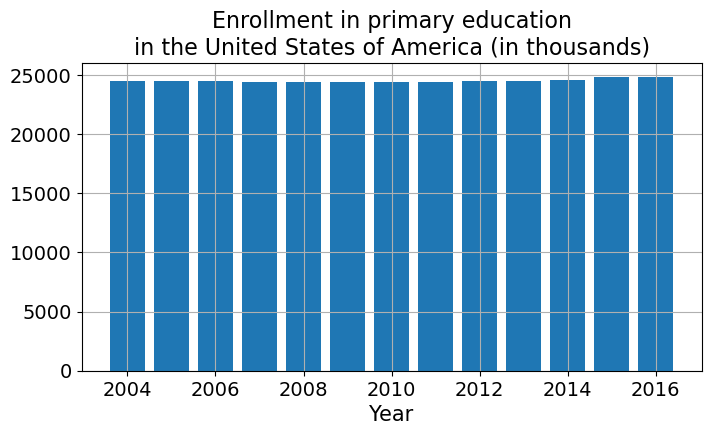

In [31]:
plt.figure(figsize=(8,4))
plt.bar(primary_enrollment_USA['Year'],primary_enrollment_USA['Enrollments (Thousands)'])
plt.title("Enrollment in primary education\nin the United States of America (in thousands)",fontsize=16)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=15)
plt.show()

In [32]:
#Now time to combine the world bank info from second file

#first to read it:

#book shows an issue with bad lines (so function added to pandas read) and delimiter being \t, not ,

df3=pd.read_csv("India_World_Bank_Info.csv",error_bad_lines=False,delimiter='\t')

In [33]:
df3.head(10)

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,11/14/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,...,2.008000e+03,2.009000e+03,2.010000e+03,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2017.0
4,India,IND,"Presence of peace keepers (number of troops, p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,India,IND,"Intentional homicides (per 100,000 people)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.842386e+00,3.773790e+00,3.774227e+00,3.819646e+00,3.758949e+00,3.588249e+00,3.660058e+00,3.390616e+00,3.223699e+00,NaN
6,India,IND,"Intentional homicides, male (per 100,000 male)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.672067e+00,4.441221e+00,4.477722e+00,4.468985e+00,4.431416e+00,4.218435e+00,4.333956e+00,4.020842e+00,3.735951e+00,NaN
7,India,IND,"Intentional homicides, female (per 100,000 fem...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.948596e+00,3.054638e+00,3.016158e+00,3.119986e+00,3.034514e+00,2.909561e+00,2.934533e+00,2.712336e+00,2.672389e+00,NaN
8,India,IND,"Internally displaced persons, total displaced ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.000000e+05,6.500000e+05,6.500000e+05,1.000000e+06,5.260000e+05,8.540000e+05,6.120000e+05,7.960000e+05,806000.0
9,India,IND,"Internally displaced persons, new displacement...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.662000e+06,5.304000e+06,1.411000e+06,1.503000e+06,9.110000e+06,2.145000e+06,3.428000e+06,3.655000e+06,2.400000e+06,1346000.0


In [34]:
#skip some rows
df3=pd.read_csv("India_World_Bank_Info.csv",error_bad_lines=False,delimiter='\t',skiprows=4)

In [35]:
df3.head(10)

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,India,IND,"Presence of peace keepers (number of troops, p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,IND,"Intentional homicides (per 100,000 people)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.842386e+00,3.773790e+00,3.774227e+00,3.819646e+00,3.758949e+00,3.588249e+00,3.660058e+00,3.390616e+00,3.223699e+00,NaN
2,India,IND,"Intentional homicides, male (per 100,000 male)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.672067e+00,4.441221e+00,4.477722e+00,4.468985e+00,4.431416e+00,4.218435e+00,4.333956e+00,4.020842e+00,3.735951e+00,NaN
3,India,IND,"Intentional homicides, female (per 100,000 fem...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.948596e+00,3.054638e+00,3.016158e+00,3.119986e+00,3.034514e+00,2.909561e+00,2.934533e+00,2.712336e+00,2.672389e+00,NaN
4,India,IND,"Internally displaced persons, total displaced ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.000000e+05,6.500000e+05,6.500000e+05,1.000000e+06,5.260000e+05,8.540000e+05,6.120000e+05,7.960000e+05,8.060000e+05
5,India,IND,"Internally displaced persons, new displacement...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.662000e+06,5.304000e+06,1.411000e+06,1.503000e+06,9.110000e+06,2.145000e+06,3.428000e+06,3.655000e+06,2.400000e+06,1.346000e+06
6,India,IND,"Internally displaced persons, new displacement...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.300000e+04,1.070000e+05,5.300000e+04,5.000000e+05,6.400000e+04,3.450000e+05,1.000000e+03,4.480000e+05,7.800000e+04
7,India,IND,Battle-related deaths (number of people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.076000e+03,1.115000e+03,1.029000e+03,4.330000e+02,4.090000e+02,3.840000e+02,4.630000e+02,4.950000e+02,6.550000e+02,6.560000e+02
8,India,IND,Travel services (% of commercial service exports),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.119735e+01,1.204084e+01,1.242864e+01,1.283755e+01,1.239164e+01,1.237169e+01,1.257876e+01,1.349412e+01,1.390979e+01,1.492431e+01
9,India,IND,Transport services (% of commercial service ex...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.211740e+01,1.214528e+01,1.138684e+01,1.283318e+01,1.207117e+01,1.137553e+01,1.187446e+01,9.195540e+00,9.412085e+00,9.260048e+00


In [36]:
#data needs to be transposed because years are columns and having checked excel file, found indicator name and a filter on that for GDP is what we need

df4=df3[df3['Indicator Name']=='GDP per capita (current US$)'].T

In [37]:
df4.head(10)

,981
Country Name,India
Country Code,IND
Indicator Name,GDP per capita (current US$)
1960,81.284764
1961,84.426437
1962,88.914919
1963,100.048592
1964,114.315161
1965,118.063383
1966,89.053583


In [38]:
df4.reset_index(inplace=True)
df4.head(10)

,index,981
0,Country Name,India
1,Country Code,IND
2,Indicator Name,GDP per capita (current US$)
3,1960,81.284764
4,1961,84.426437
5,1962,88.914919
6,1963,100.048592
7,1964,114.315161
8,1965,118.063383
9,1966,89.053583


In [39]:
#remove redundent rows and reindex
df4.drop([0,1,2],inplace=True)


In [40]:
df4.head(10)

,index,981
3,1960,81.284764
4,1961,84.426437
5,1962,88.914919
6,1963,100.048592
7,1964,114.315161
8,1965,118.063383
9,1966,89.053583
10,1967,95.330783
11,1968,98.831235
12,1969,106.496379


In [41]:
df4.reset_index(inplace=True,drop=True)

In [42]:
df4.head(10)

,index,981
0,1960,81.284764
1,1961,84.426437
2,1962,88.914919
3,1963,100.048592
4,1964,114.315161
5,1965,118.063383
6,1966,89.053583
7,1967,95.330783
8,1968,98.831235
9,1969,106.496379


In [43]:
#rename columns
df4.columns=['Year','GDP']

In [44]:
#only need data from 2003 - so check of where to cut the data down
df4.tail(20)

,Year,GDP
38,1998,409.194386
39,1999,437.586118
40,2000,438.86463
41,2001,447.013897
42,2002,466.200804
43,2003,541.135228
44,2004,621.318377
45,2005,707.008019
46,2006,792.02597
47,2007,1018.166373


In [45]:
#rows 43 to 57 all thats's need, dataframe from them

df_gdp=df4.iloc[[i for i in range(43,57)]]

In [46]:
df_gdp.reset_index(inplace=True,drop=True)
df_gdp


,Year,GDP
0,2003,541.135228
1,2004,621.318377
2,2005,707.008019
3,2006,792.02597
4,2007,1018.166373
5,2008,991.48463
6,2009,1090.317765
7,2010,1345.770153
8,2011,1461.671957
9,2012,1446.98541


In [47]:
#year not an int, so will have trouble combining - apply will change type

df_gdp['Year']=df_gdp['Year'].apply(int)

In [48]:
#merge GDP into orginal and new dataframe on year

primary_enrollment_with_gdp=primary_enrollment_india.merge(df_gdp,on='Year')
primary_enrollment_with_gdp

,Data,Enrollments (Thousands),Footnotes,Region/Country/Area,Year,GDP
0,Students enrolled in primary education (thousa...,125569.00,NaN,India,2003,541.135228
1,Students enrolled in primary education (thousa...,127404.00,NaN,India,2004,621.318377
2,Students enrolled in primary education (thousa...,129239.00,NaN,India,2005,707.008019
3,Students enrolled in primary education (thousa...,131074.00,NaN,India,2006,792.02597
4,Students enrolled in primary education (thousa...,132909.00,NaN,India,2007,1018.166373
5,Students enrolled in primary education (thousa...,134744.00,NaN,India,2008,991.48463
6,Students enrolled in primary education (thousa...,136579.00,NaN,India,2009,1090.317765
7,Students enrolled in primary education (thousa...,138414.00,NaN,India,2010,1345.770153
8,Students enrolled in primary education (thousa...,138262.75,NaN,India,2011,1461.671957
9,Students enrolled in primary education (thousa...,138111.50,NaN,India,2012,1446.98541


In [49]:
#rearrange columns
primary_enrollment_with_gdp = primary_enrollment_with_gdp[['Year','Enrollments (Thousands)','GDP']]

In [50]:
primary_enrollment_with_gdp

,Year,Enrollments (Thousands),GDP
0,2003,125569.00,541.135228
1,2004,127404.00,621.318377
2,2005,129239.00,707.008019
3,2006,131074.00,792.02597
4,2007,132909.00,1018.166373
5,2008,134744.00,991.48463
6,2009,136579.00,1090.317765
7,2010,138414.00,1345.770153
8,2011,138262.75,1461.671957
9,2012,138111.50,1446.98541


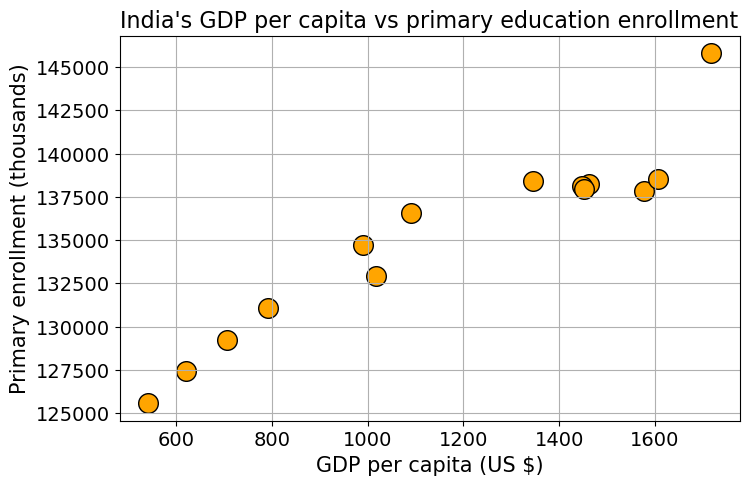

In [51]:
plt.figure(figsize=(8,5))
plt.title("India's GDP per capita vs primary education enrollment",fontsize=16)
plt.scatter(primary_enrollment_with_gdp['GDP'],
            primary_enrollment_with_gdp['Enrollments (Thousands)'],
           edgecolor='k',color='orange',s=200)
plt.xlabel("GDP per capita (US $)",fontsize=15)
plt.ylabel("Primary enrollment (thousands)",fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

#Data now nicely prepared and book shows a demo of how to create a database file 

importing the sqlite3 module of Python and then use the connect function to connect to a database. In sqlite3 no server or database. The main database engine is embedded. But for a different database like Postgresql or MySQL we will need to connect to them using those credentials.

Year as the PRIMARY KEY of this table.

In [53]:
import sqlite3

In [54]:
with sqlite3.connect("Education_GDP.db") as conn:
    cursor = conn.cursor()
    cursor.execute("CREATE TABLE IF NOT EXISTS \
                   education_gdp(Year INT, Enrollment FLOAT, GDP FLOAT, PRIMARY KEY (Year))")

In [55]:
#loop with the dataset rows one by one to insert them in the table

with sqlite3.connect("Education_GDP.db") as conn:
    cursor = conn.cursor()
    for i in range(14):
        year = int(primary_enrollment_with_gdp.iloc[i]['Year'])
        enrollment = primary_enrollment_with_gdp.iloc[i]['Enrollments (Thousands)']
        gdp = primary_enrollment_with_gdp.iloc[i]['GDP']
        #print(year,enrollment,gdp)
        cursor.execute("INSERT INTO education_gdp (Year,Enrollment,GDP) VALUES(?,?,?)",(year,enrollment,gdp))

In [ ]:
#Education_GDP file now saved!